# Deep RL (DQN)
---
We'll use OpenAI Gym: LunarLander-v2 environment to implement a Deep Reinforcement Learning agent (with DQN).




In [1]:
### 1. Imports and installs

In [3]:
!pip3 install Box2D
!pip3 install box2d
!pip3 install gym[all] # Has lots of other requirements (mujoco, etc)
!pip3 install gym
!pip3 install pyglet
!pip3 install opencv-python

zsh:1: no matches found: gym[all]


In [1]:
import gym
import random
import torch
import numpy as np
import base64, io
from collections import deque
import matplotlib.pyplot as plt
from dqn_agent import Agent
import cv2
from copy import deepcopy
%matplotlib inline

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Car Racing

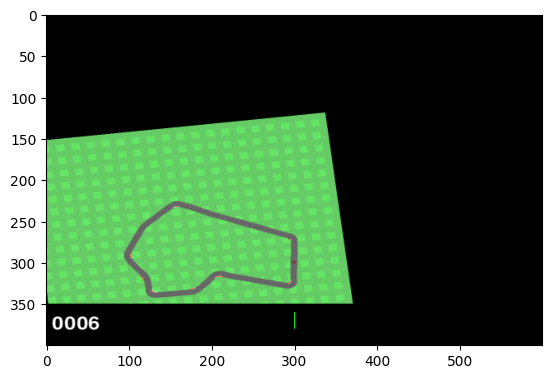

In [2]:
env = gym.make('CarRacing-v2', render_mode="rgb_array", continuous=False)
env.reset()
screen = env.render()
plt.imshow(screen)

In [3]:
# Information on the environment
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space)

State shape:  (96, 96, 3)
Number of actions:  Discrete(5)


In [4]:
from dqn_agent import Agent
agent = Agent(state_size=9216, action_size=5, seed=42)
agent

In [5]:
flatmap = lambda xs, f=(lambda x: x): [y for ys in xs for y in f(ys)]

In [6]:
# Transform to gray scale to reduce the state dimenssion and flatmap the state.
def state_transformation(state):
    state = cv2.cvtColor(state, cv2.COLOR_BGR2GRAY)
    state = cv2.equalizeHist(state)
    state = flatmap(state)
    return state
    

In [7]:
state, _ = env.reset()
state = state_transformation(state)

In [10]:
def dqn2(episodes=2000, time_steps=1500, eps_start=0.5, eps_decay=0.95, eps_increase=0.975):
    """
      Deep RL DQN.
      Runs for <episodes> storing scores on <scores>, last 100 scores on <scores_window> for showing
      
    
     :param episodes:  (int) Maximum training episodes
     :param time_steps: (int) Max timesteps
     :param eps_start: (float) Epsilon initial
     :param eps_end: (float) Epsilon final
     :param eps_decay: (float) Epsilon decay
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, episodes+1):
        state, _ = env.reset()
        score = 0
        for t in range(time_steps):
            action = agent.act(state, eps)
            next_state, reward, done, _, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)  # save most recent score
        if len(scores) >= 2 and score > scores[-2]:
            eps = max(0.01, eps_decay*eps) # decrease epsilon
        else:
            eps = min(1.0, eps/eps_increase)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnet_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn2()

Episode 100	Average Score: -82.20
Episode 200	Average Score: -61.74
Episode 300	Average Score: -61.75
Episode 400	Average Score: -62.67
Episode 500	Average Score: -63.98
Episode 509	Average Score: -54.92

KeyboardInterrupt: 